In [5]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

linhas, colunas = df.shape[0], df.shape[1]

print(f'Linhas: {linhas}')
print(f'Colunas: {colunas}')

novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'nível_experiência',
    'employment_type': 'tipo_contrato',
    'job_title': 'cargo',
    'salary': 'salário',
    'salary_currency': 'moeda_salário',
    'salary_in_usd': 'salário_em_usd',
    'employee_residence': 'residência',
    'remote_ratio': 'taxa_remoto',
    'company_location': 'localização_empresa',
    'company_size': 'tamanho_empresa'
}

df = df.rename(columns=novos_nomes)

nível_experiência = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['nível_experiência'] = df['nível_experiência'].replace(nível_experiência)

tipo_contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
df['tipo_contrato'] = df['tipo_contrato'].replace(tipo_contrato)

tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M':	'media'

}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)

mapa_trabalho = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}

df['taxa_remoto'] = df['taxa_remoto'].replace(mapa_trabalho)


df.describe(include='object')


Linhas: 133349
Colunas: 11


,nível_experiência,tipo_contrato,cargo,moeda_salário,residência,taxa_remoto,localização_empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,senior,integral,Data Scientist,USD,US,presencial,US,media
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [6]:
df.head()

,ano,nível_experiência,tipo_contrato,cargo,salário,moeda_salário,salário_em_usd,residência,taxa_remoto,localização_empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [7]:
df.isnull()

,ano,nível_experiência,tipo_contrato,cargo,salário,moeda_salário,salário_em_usd,residência,taxa_remoto,localização_empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

,0
ano,10
nível_experiência,0
tipo_contrato,0
cargo,0
salário,0
moeda_salário,0
salário_em_usd,0
residência,0
taxa_remoto,0
localização_empresa,0


In [9]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [10]:
df[df.isnull().any(axis=1)]

,ano,nível_experiência,tipo_contrato,cargo,salário,moeda_salário,salário_em_usd,residência,taxa_remoto,localização_empresa,tamanho_empresa
5588,NaN,senior,integral,Product Manager,184500,USD,184500,US,presencial,US,media
59692,NaN,pleno,integral,Engineer,110000,USD,110000,DE,presencial,DE,media
59710,NaN,junior,integral,Data Scientist,208800,USD,208800,US,presencial,US,media
59759,NaN,senior,integral,Software Engineer,135000,USD,135000,US,presencial,US,media
59789,NaN,senior,integral,Engineer,112000,USD,112000,US,presencial,US,media
131000,NaN,senior,integral,Machine Learning Engineer,163800,USD,163800,US,presencial,US,media
131006,NaN,senior,integral,Data Analytics Manager,204500,USD,204500,US,presencial,US,media
133054,NaN,junior,integral,Data Scientist,40000,USD,40000,JP,remoto,MY,grande
133281,NaN,pleno,integral,Machine Learning Engineer,180000,PLN,46597,PL,remoto,PL,grande
133317,NaN,pleno,integral,Data Scientist,130000,USD,130000,US,hibrido,US,grande


In [11]:
import numpy as np

df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'salario': [4000, np.nan, 3500, np.nan, 5000]
})

df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,4166.67,4000.0
2,Carlos,3500.0,3500.00,3500.0
3,Diana,NaN,4166.67,4000.0
4,Eduardo,5000.0,5000.00,5000.0


In [12]:
df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()

df_temperaturas

,dia,temperatura,preenchido_ffill
0,Seg,30.0,30.0
1,Ter,NaN,30.0
2,Qua,NaN,30.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


In [13]:
df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill()

df_temperaturas

,dia,temperatura,preenchido_bfill
0,Seg,30.0,30.0
1,Ter,NaN,28.0
2,Qua,NaN,28.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


In [14]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Salvador']
})

df_cidades['cidade_corrigida'] = df_cidades['cidade'].fillna('Não informado')

df_cidades

,nome,cidade,cidade_corrigida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Diana,NaN,Não informado
4,Eduardo,Salvador,Salvador


In [16]:
df_limpo = df.dropna()

df_limpo.isnull().sum()

,0
ano,0
nível_experiência,0
tipo_contrato,0
cargo,0
salário,0
moeda_salário,0
salário_em_usd,0
residência,0
taxa_remoto,0
localização_empresa,0


In [17]:
df_limpo.head()

,ano,nível_experiência,tipo_contrato,cargo,salário,moeda_salário,salário_em_usd,residência,taxa_remoto,localização_empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [18]:
df_limpo = df_limpo.assign(ano=df_limpo['ano'].astype('Int64'))

df_limpo.head()

,ano,nível_experiência,tipo_contrato,cargo,salário,moeda_salário,salário_em_usd,residência,taxa_remoto,localização_empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [19]:
df_limpo.to_csv('dados-imersao.csv', index=False)

df_limpo.head()

,ano,nível_experiência,tipo_contrato,cargo,salário,moeda_salário,salário_em_usd,residência,taxa_remoto,localização_empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


<Axes: title={'center': 'Distribuição dos níveis de experiência'}, xlabel='nível_experiência'>

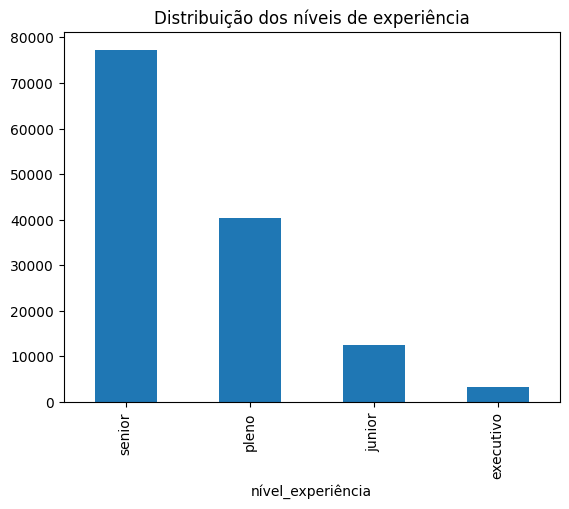

In [20]:
df['nível_experiência'].value_counts().plot(kind='bar', title='Distribuição dos níveis de experiência')


<Axes: xlabel='nível_experiência', ylabel='salário_em_usd'>

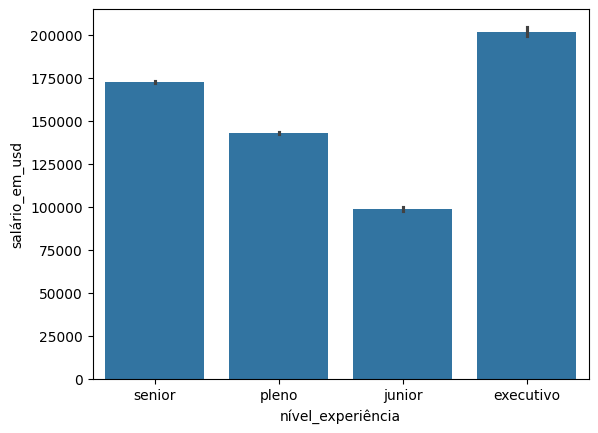

In [22]:
import seaborn as sns

sns.barplot(data=df_limpo, x='nível_experiência', y='salário_em_usd', estimator='mean')

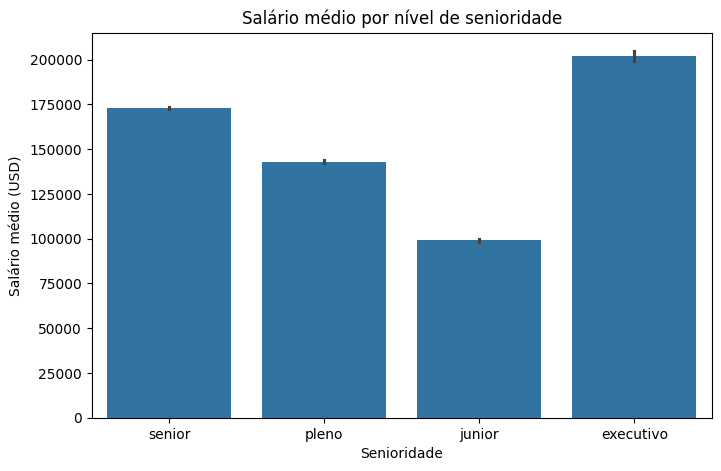

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='nível_experiência', y='salário_em_usd', estimator='mean')
plt.title('Salário médio por nível de senioridade')
plt.ylabel('Salário médio (USD)')
plt.xlabel('Senioridade')
plt.show()

In [27]:
df.groupby('nível_experiência')['salário_em_usd'].mean().sort_values(ascending=False)

,salário_em_usd
nível_experiência,
executivo,202027.667813
senior,172850.003845
pleno,143041.323489
junior,99039.040264


In [29]:
ordem = df.groupby('nível_experiência')['salário_em_usd'].mean().sort_values(ascending=False).index
ordem

Index(['executivo', 'senior', 'pleno', 'junior'], dtype='object', name='nível_experiência')

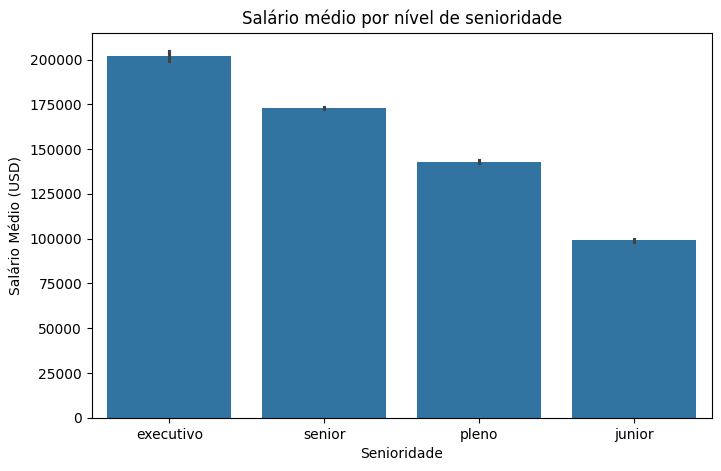

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='nível_experiência', y='salário_em_usd', estimator='mean', order=ordem)
plt.title('Salário médio por nível de senioridade')
plt.ylabel('Salário Médio (USD)')
plt.xlabel('Senioridade')
plt.show()

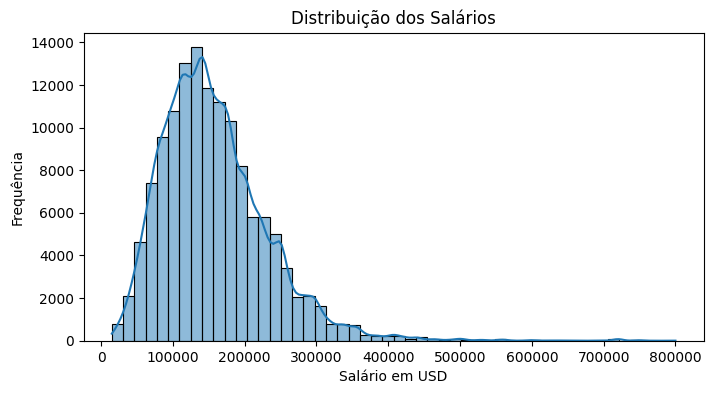

In [32]:
plt.figure(figsize=(8, 4))
sns.histplot(df_limpo['salário_em_usd'], bins=50, kde=True)
plt.title('Distribuição dos Salários')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

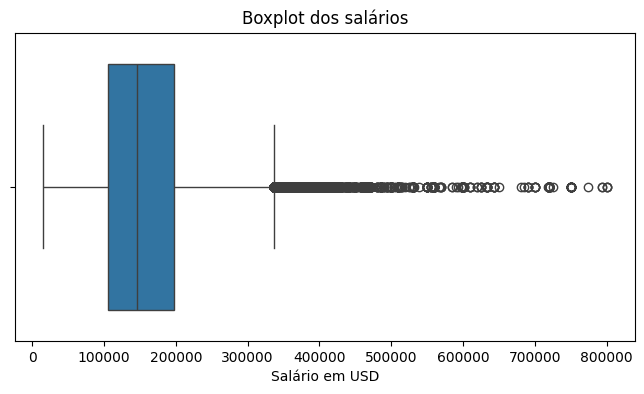

In [33]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_limpo['salário_em_usd'])
plt.title('Boxplot dos salários')
plt.xlabel('Salário em USD')
plt.show()

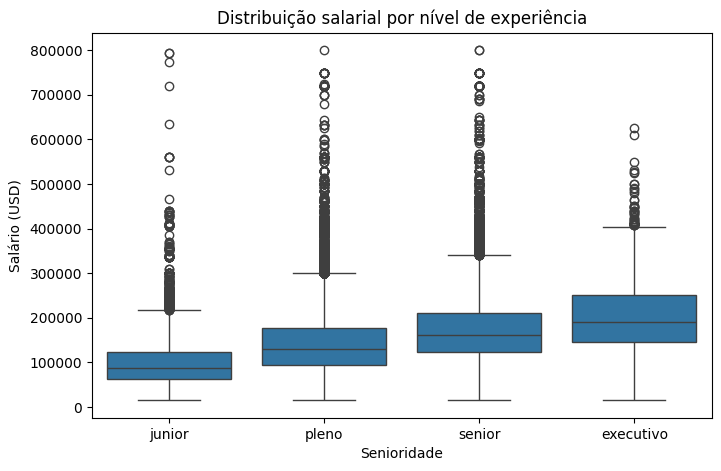

In [34]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='nível_experiência', y='salário_em_usd', data=df, order=ordem_senioridade)
plt.title('Distribuição salarial por nível de experiência')
plt.xlabel('Senioridade')
plt.ylabel('Salário (USD)')
plt.show()

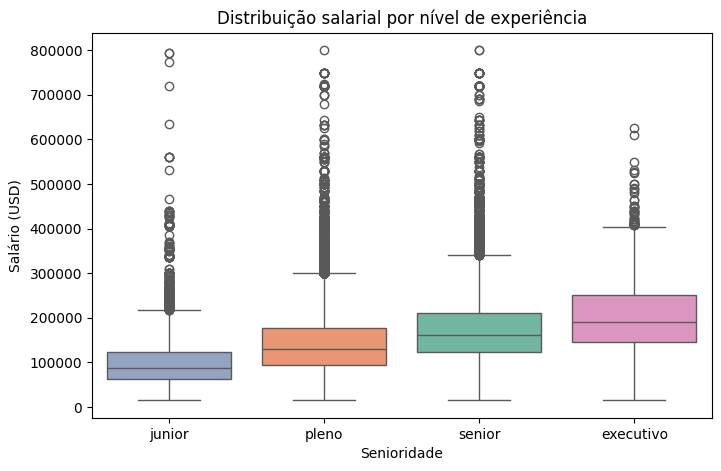

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='nível_experiência', y='salário_em_usd', data=df, order=ordem_senioridade, palette='Set2', hue='nível_experiência')
plt.title('Distribuição salarial por nível de experiência')
plt.xlabel('Senioridade')
plt.ylabel('Salário (USD)')
plt.show()


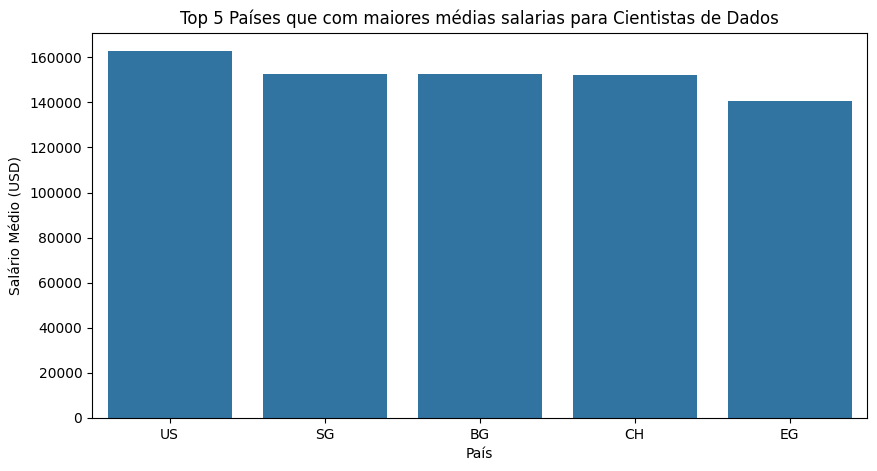

In [39]:
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds = df_ds.groupby('residência')['salário_em_usd'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='residência', y='salário_em_usd', data=media_ds.head(5))
plt.title('Top 5 Países que com maiores médias salarias para Cientistas de Dados')
plt.xlabel('País')
plt.ylabel('Salário Médio (USD)')
plt.show()
